In [3]:
!pip install numpy
!pip install gym
!pip install matplotlib

     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
      --------------------------------------- 10.2/721.7 kB ? eta -:--:--
     ------ ------------------------------- 122.9/721.7 kB 1.2 MB/s eta 0:00:01
     -------------------------------------  716.8/721.7 kB 5.7 MB/s eta 0:00:01
     -------------------------------------  716.8/721.7 kB 5.7 MB/s eta 0:00:01
     -------------------------------------- 721.7/721.7 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827633 sha256=23377ea659c6d7cc515676c1675d1fbb445345769791e6d763da87c3d2d900d7
  Stored in directory: c:\users\rbansal\appdata\local\pip

In [4]:
import numpy as np
#import tools
import gym
import matplotlib.pyplot as plt
env = gym.make('FrozenLake-v1')

num_states = env.observation_space.n
num_actions = env.action_space.n

In [8]:
def value_iteration(env, gamma = 0.9, theta = 1e-4):

    values = []
    V = np.zeros(num_states)
    values.append(V.copy())
    while(True):
        diff = 0
        for s in range(num_states):
            v_curr = V[s]
            max_sum_action = float('-inf')
            for a in range(num_actions):

                sum_action = 0
                for p,s_,r,done in env.P[s][a]:
                    sum_action += p*(r + gamma*V[s_])
                max_sum_action = max(max_sum_action,sum_action)

            V[s] = max_sum_action
            diff = max(diff,abs(v_curr - V[s]))
        values.append(V.copy())
        #print(V)
        if diff < theta:
            break
        #print(diff)
    norms = []

    for i in range(len(values)-1):
        norms.append(np.linalg.norm(values[i+1] - values[i]))

    indices = range(len(norms))
    #print(values)
    plt.plot(indices, norms, marker = '.')
    plt.title("V_k - V_{k-1} vs. k")
    plt.xlabel("k")
    plt.ylabel("V_k - V_{k-1}")
    plt.show()
    policy = np.zeros(num_states)
    #print(V)

    for s in range(num_states):
        Q = np.zeros(num_actions)

        for a in range(num_actions):
            sum_action = 0
            for p,s_,r,done in env.P[s][a]:
                sum_action += p*(r + gamma*V[s_])
            Q[a] = sum_action
        
        policy[s] = np.argmax(Q)

    #print(policy)

    plt.plot(range(num_states), V, marker = '.')
    plt.title("Optimal Value function")
    plt.xlabel("State")
    plt.ylabel("Value function")

    plt.show()

    plt.plot(range(num_states), policy, marker = '.')
    plt.title("Optimal Policy")
    plt.xlabel("State")
    plt.ylabel("Action")

    plt.show()
    return V, policy

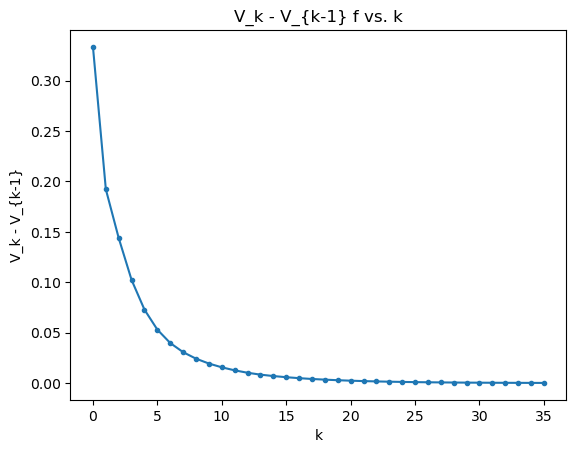

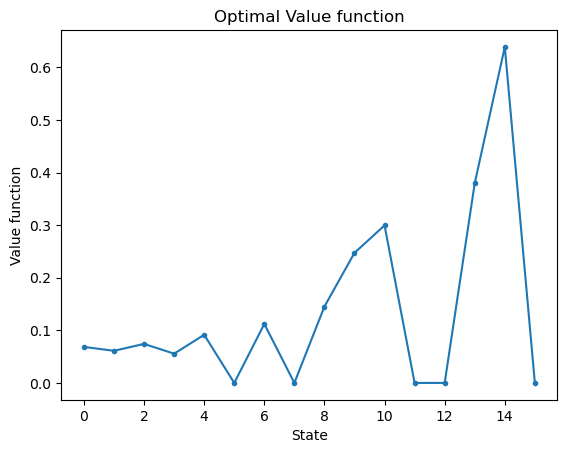

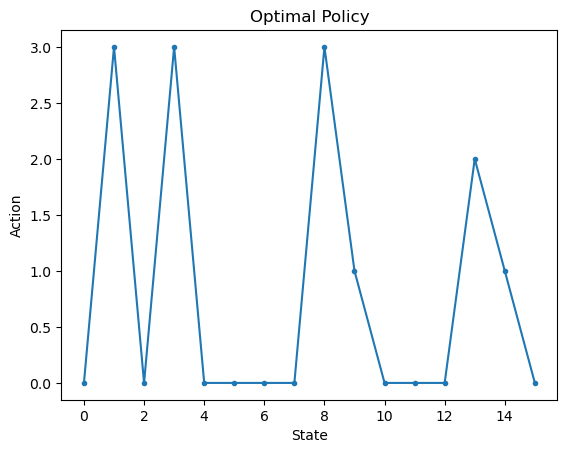

In [11]:
Value_function, optimal_policy = value_iteration(env)

In [12]:
print(Value_function)

[0.06848032 0.06111567 0.07422254 0.05560469 0.09153995 0.
 0.11212558 0.         0.14522151 0.24737863 0.29954442 0.
 0.         0.37986011 0.63898452 0.        ]


In [13]:
print(optimal_policy)

[0. 3. 0. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]
